In [1]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hrv-dataset/hrv dataset/quick_start.py
/kaggle/input/hrv-dataset/hrv dataset/papers/Koldijk et. al - 2018.pdf
/kaggle/input/hrv-dataset/hrv dataset/papers/Kizito et. al - 2019.pdf
/kaggle/input/hrv-dataset/hrv dataset/papers/Koldijk et al. - 2014pdf.pdf
/kaggle/input/hrv-dataset/hrv dataset/hrv dataset/quick_start.py
/kaggle/input/hrv-dataset/hrv dataset/hrv dataset/papers/Koldijk et. al - 2018.pdf
/kaggle/input/hrv-dataset/hrv dataset/hrv dataset/papers/Kizito et. al - 2019.pdf
/kaggle/input/hrv-dataset/hrv dataset/hrv dataset/papers/Koldijk et al. - 2014pdf.pdf
/kaggle/input/hrv-dataset/hrv dataset/hrv dataset/data/raw/rri/p17.txt
/kaggle/input/hrv-dataset/hrv dataset/hrv dataset/data/raw/rri/p7.txt
/kaggle/input/hrv-dataset/hrv dataset/hrv dataset/data/raw/rri/p12.txt
/kaggle/input/hrv-dataset/hrv dataset/hrv dataset/data/raw/rri/p19.txt
/kaggle/input/hrv-dataset/hrv dataset/hrv dataset/data/raw/rri/p15.txt
/kaggle/input/hrv-dataset/hrv dataset/hrv dataset/data/raw/rri

# Import Libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, LSTM, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
%load_ext tensorboard

2024-01-30 15:45:16.750654: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 15:45:16.750771: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 15:45:16.880618: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Preprocessing

In [3]:
df_test = pd.read_csv(r"../input/hrv-dataset/hrv dataset/data/final/test.csv")
df_train = pd.read_csv(r"../input/hrv-dataset/hrv dataset/data/final/train.csv")
print(f"df_train shape{df_train.shape}")
print(f"df_test shape{df_test.shape}")

df_train shape(369289, 36)
df_test shape(41033, 36)


In [4]:
df_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [5]:
df_train['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

In [6]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   SD1                369289 non-null  float64
 10  SD2                369289 non-null  float64
 11  KURT               369289 non-null  float64
 12  SKEW               369289 non-null  float64
 13  MEAN_REL_RR        369289 non-null  float64
 14  MEDIAN_REL_RR      369289 non-null  float64
 15  SDRR_REL_RR        369289 non-null  float64
 16  RM

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41033 entries, 0 to 41032
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEAN_RR            41033 non-null  float64
 1   MEDIAN_RR          41033 non-null  float64
 2   SDRR               41033 non-null  float64
 3   RMSSD              41033 non-null  float64
 4   SDSD               41033 non-null  float64
 5   SDRR_RMSSD         41033 non-null  float64
 6   HR                 41033 non-null  float64
 7   pNN25              41033 non-null  float64
 8   pNN50              41033 non-null  float64
 9   SD1                41033 non-null  float64
 10  SD2                41033 non-null  float64
 11  KURT               41033 non-null  float64
 12  SKEW               41033 non-null  float64
 13  MEAN_REL_RR        41033 non-null  float64
 14  MEDIAN_REL_RR      41033 non-null  float64
 15  SDRR_REL_RR        41033 non-null  float64
 16  RMSSD_REL_RR       410

None

In [7]:
df_train['condition'] = df_train['condition'].map({'no stress':0, 'interruption':1, 'time pressure':2})
df_test['condition'] = df_test['condition'].map({'no stress':0, 'interruption':1, 'time pressure':2})

In [8]:
df_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,1
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,1
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,0


In [9]:
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

# Model Creation and Training

In [10]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Conv1D, MaxPooling1D, Dropout, Dense
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

model = Sequential()


model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=1))

model.add(Bidirectional(LSTM(256, return_sequences=False)))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))  
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=128)

Epoch 1/100


I0000 00:00:1706629540.877789     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2020/2020 [==============================] - 38s 15ms/step - loss: 0.6090 - accuracy: 0.7307 - val_loss: 0.3015 - val_accuracy: 0.8759
Epoch 2/100
2020/2020 [==============================] - 29s 14ms/step - loss: 0.2030 - accuracy: 0.9207 - val_loss: 0.0873 - val_accuracy: 0.9693
Epoch 3/100
2020/2020 [==============================] - 29s 14ms/step - loss: 0.0860 - accuracy: 0.9698 - val_loss: 0.0505 - val_accuracy: 0.9819
Epoch 4/100
2020/2020 [==============================] - 29s 14ms/step - loss: 0.0555 - accuracy: 0.9817 - val_loss: 0.0514 - val_accuracy: 0.9815
Epoch 5/100
2020/2020 [==============================] - 30s 15ms/step - loss: 0.0450 - accuracy: 0.9856 - val_loss: 0.0095 - val_accuracy: 0.9971
Epoch 6/100
2020/2020 [==============================] - 29s 14ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0159 - val_accuracy: 0.9948
Epoch 7/100
2020/2020 [==============================] - 29s 14ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0182 - val_

# Evaluation

In [12]:
X_test = df_test.iloc[:, :-1].values
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) 
y_test = df_test.iloc[:, -1].values
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

validation_accuracy = history.history['val_accuracy'][99]
validation_loss = history.history['val_loss'][99]

print("Validation Accuracy:", validation_accuracy)
print("Validation Loss:", validation_loss)

1283/1283 [==============================] - 6s 4ms/step - loss: 6.0773e-04 - accuracy: 0.9998
Test accuracy: 0.9997806549072266
Test loss: 0.0006077310536056757
Validation Accuracy: 0.9998826384544373
Validation Loss: 0.00033683489891700447


In [13]:
from sklearn.metrics import classification_report
predict_x=model.predict(X_test)
y_pred=np.argmax(predict_x,axis=1)
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")


1283/1283 [==============================] - 5s 3ms/step
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22158
           1       1.00      1.00      1.00     11782
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



In [14]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 35, 128)           512       
                                                                 
 max_pooling1d (MaxPooling1  (None, 35, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 35, 64)            24640     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 35, 64)            0         
 g1D)                                                            
                                                                 
 bidirectional (Bidirection  (None, 512)               657408    
 al)                                                             
                                                        

# Confusion Matrix

1283/1283 [==============================] - 4s 3ms/step


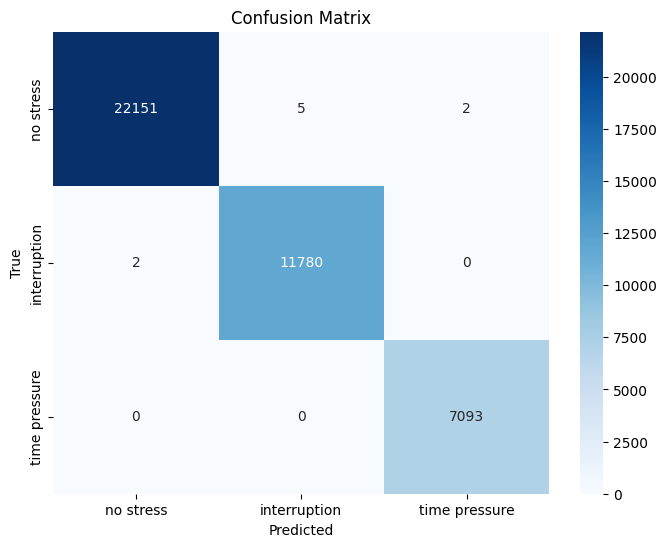

In [15]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
plot_confusion_matrix(y_test, y_pred, classes=['no stress', 'interruption', 'time pressure'])

# Training & Validation Curves

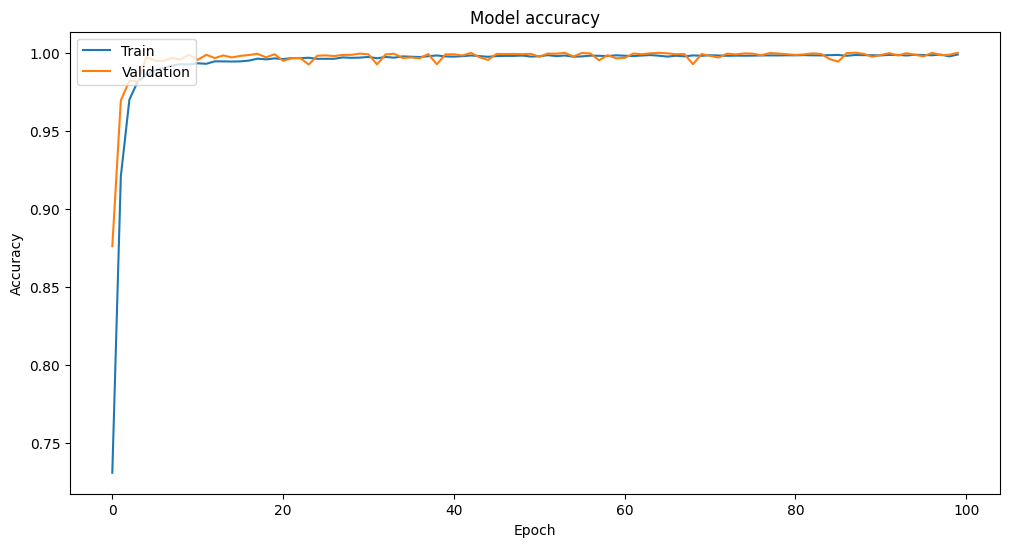

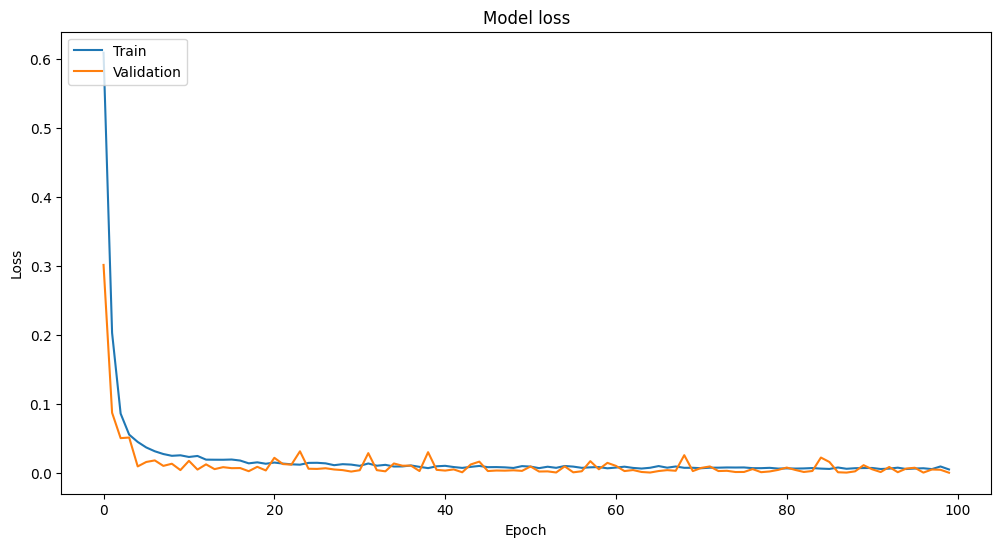

In [16]:

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Receiver Operating Characteristic (ROC) curve and Area Under Curve (AUC)

1283/1283 [==============================] - 4s 3ms/step


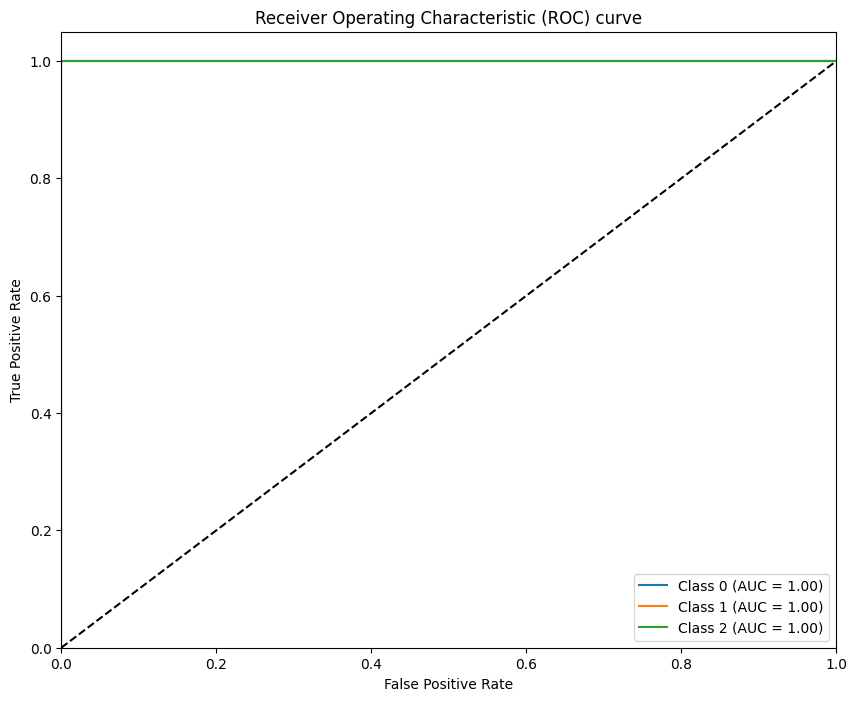

In [17]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = model.predict(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()